In [1]:
# data set: https://www.kaggle.com/datasets/elkamel/corel-images


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.spatial import distance as dist

In [2]:
def load_images_from_folder(folder):
    data=[]
    for filename in os.listdir("dataset/training_set/"+folder):
        img = cv2.imread(os.path.join("dataset/training_set/"+folder,filename))
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        histogram_gray = cv2.calcHist([img_gray], [0], None, [255], [0,256])
        histogram_rgb = cv2.calcHist([img_rgb], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
        normalize_histogram_rgb=cv2.normalize(histogram_rgb, histogram_rgb).flatten()
        normalize_histogram_gray=cv2.normalize(histogram_gray, histogram_gray).flatten()
        
        
        data.append([img, img_gray, histogram_rgb, histogram_gray,
                     normalize_histogram_rgb,normalize_histogram_gray ,filename,folder])
    return data

In [3]:
def compare(img):
    result=[]

    testpath = 'dataset/test_set/'+img
    testImg = cv2.imread(testpath)
    test_Img_Gray = cv2.cvtColor(testImg, cv2.COLOR_BGR2GRAY)
    test_Img_RGB = cv2.cvtColor(testImg, cv2.COLOR_BGR2RGB)
    hist_Img_Gray = cv2.calcHist([test_Img_Gray], [0], None, [255], [0,256])
    hist_Img_RGB = cv2.calcHist([test_Img_RGB], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
    normalize_histogram_rgb=cv2.normalize(hist_Img_RGB, hist_Img_RGB).flatten()

    for img in data:
        result.append([cv2.compareHist(hist_Img_RGB, img[2], cv2.HISTCMP_CORREL),img[0],img[6],img[7]])
    
    return result


In [4]:
def sort(result,valueName,ascending):
    col=["Result","Img","Folder","Name"]
    res=pd.DataFrame(result,columns=col)
    sortRes=res.sort_values(by=[valueName], ascending=ascending)
    return sortRes
    

In [5]:
def printImg(orjImg,data,index):
    orjImgRGB = cv2.cvtColor(orjImg, cv2.COLOR_BGR2RGB)
    plt.imshow(orjImgRGB)
    plt.axis('off')
    plt.title("Orj Image")
    
    fig = plt.figure(figsize=(10, 7))
    counter=0
    for i in index:
            if counter>4:
                break
            fig.add_subplot(3, 3, (counter+1))
            img_rgb = cv2.cvtColor(data["Img"][i], cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
            plt.axis('off')
            plt.title(data["Name"][i]+" - "+data["Folder"][i]+" - "+str(round(data["Result"][i],3)))

            counter+=1
    

In [6]:
def printHist(orjImg,data,index):
    
    b,g,r=cv2.split(orjImg)
    plt.title("Orj Image Histogram")
    plt.hist(b.ravel(),256,[0,255],color="blue")
    plt.hist(g.ravel(),256,[0,255],color="green")
    plt.hist(r.ravel(),256,[0,255],color="red")
    
    
    fig = plt.figure(figsize=(10, 7))
    counter=0
    for i in index:
            if counter>4:
                break
            counter+=1
            fig.add_subplot(3, 3, (counter+1))

            b,g,r=cv2.split(data["Img"][i])
            plt.title(data["Name"][i]+" - "+data["Folder"][i]+" - "+str(round(data["Result"][i],3)))
            plt.hist(b.ravel(),256,[0,255],color="blue")
            plt.hist(g.ravel(),256,[0,255],color="green")
            plt.hist(r.ravel(),256,[0,255],color="red")
            plt.show()


In [7]:
mypath='dataset/training_set/'
folderName=os.listdir(mypath)
print(folderName)
data=[]
for folder in folderName:
     data+=load_images_from_folder(folder)


['beaches', 'bus', 'dinosaurs', 'elephants', 'flowers', 'foods', 'horses', 'monuments', 'mountains_and_snow', 'peolpe_and_villages_in_Africa']


In [8]:
imgCompare="flowers/601.jpg"
res=compare(imgCompare)
testImg=cv2.imread('dataset/test_set/'+imgCompare)
sortResult=sort(res,"Result",False)

index=[]
for i in sortResult.index:
    index.append(i)


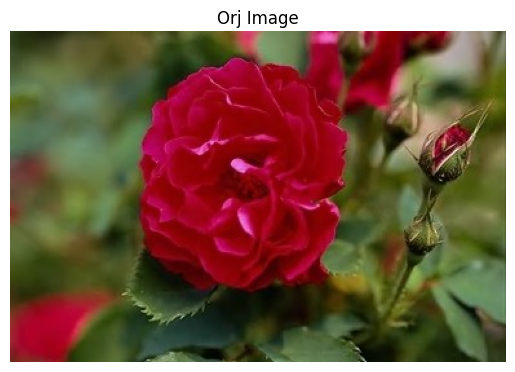

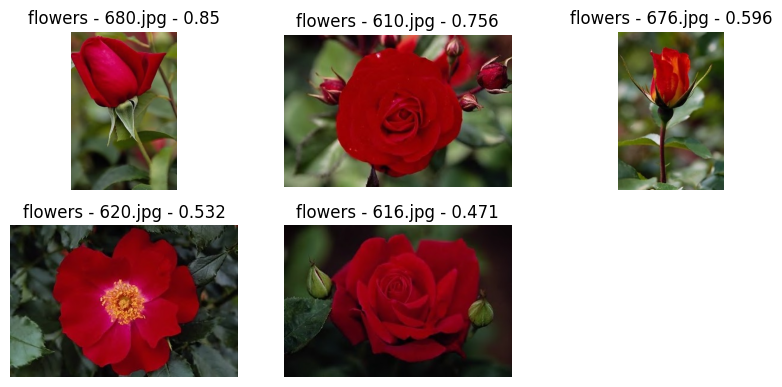

In [9]:
printImg(testImg,sortResult,index)

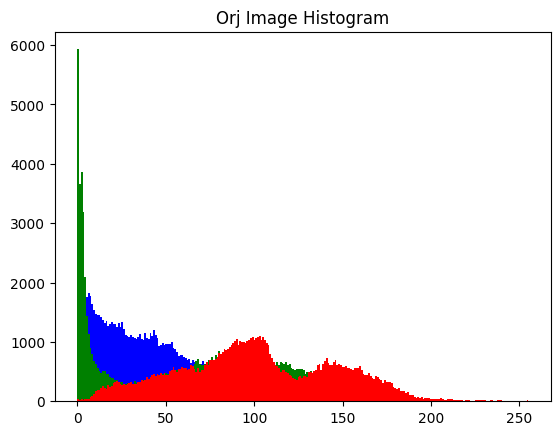

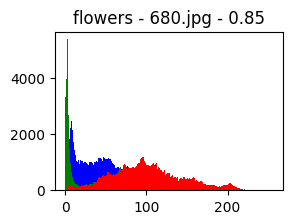

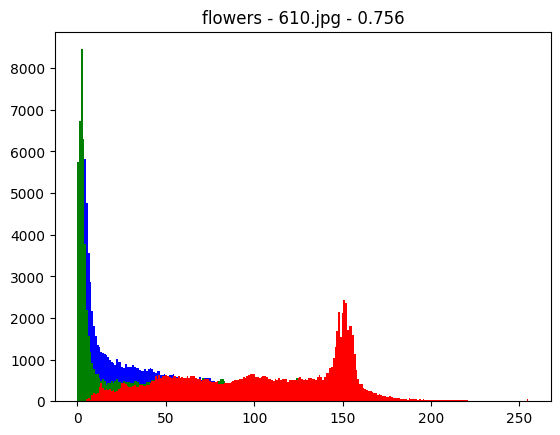

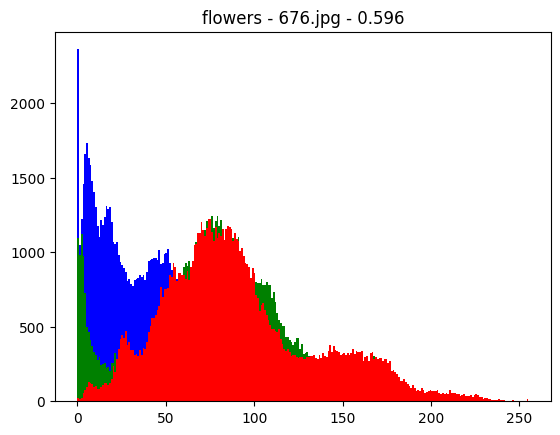

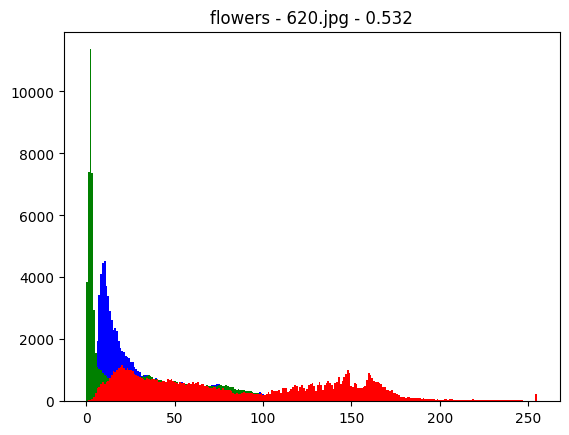

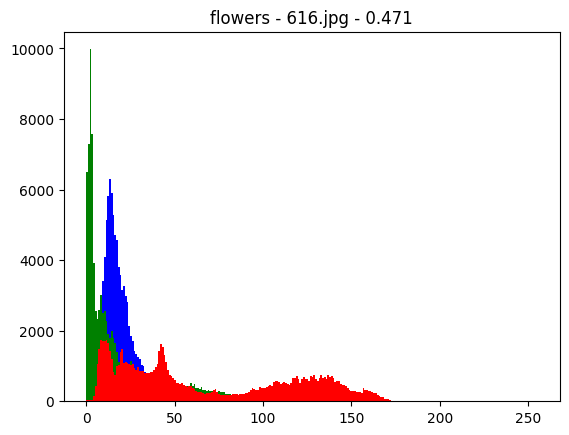

In [10]:
printHist(testImg,sortResult,index)

# Scipy

In [11]:
def scipy(img):
    result=[]
    testpath = 'dataset/test_set/'+img
    testImg = cv2.imread(testpath)
    test_Img_Gray = cv2.cvtColor(testImg, cv2.COLOR_BGR2GRAY)
    test_Img_RGB = cv2.cvtColor(testImg, cv2.COLOR_BGR2RGB)
    hist_Img_Gray = cv2.calcHist([test_Img_Gray], [0], None, [255], [0,256])
    hist_Img_RGB = cv2.calcHist([test_Img_RGB], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
    normalize_histogram_gray=cv2.normalize(hist_Img_Gray, hist_Img_Gray).flatten()
    normalize_histogram_rgb=cv2.normalize(hist_Img_RGB, hist_Img_RGB).flatten()


    #("Euclidean", dist.euclidean),
    #("Manhattan", dist.cityblock),
    #("Chebysev", dist.chebyshev))

    for img in data:
        result.append([dist.cityblock(normalize_histogram_rgb, img[4]),img[0],img[6],img[7]]) 
    return result


In [12]:
imgScipy="dinosaurs/400.jpg"
resScipy=scipy(imgScipy)
testImgScipy=cv2.imread('dataset/test_set/'+imgScipy)
sortResScipy=sort(resScipy,"Result",True)


indexScipy=[]
for i in sortResScipy.index:
    indexScipy.append(i)

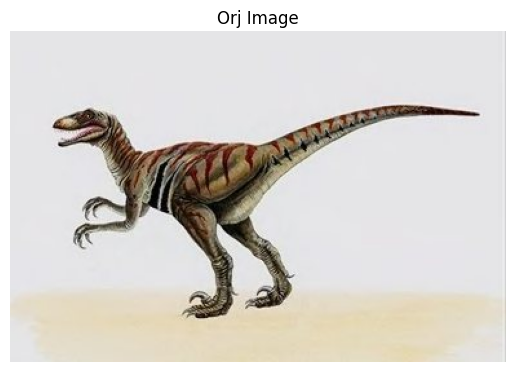

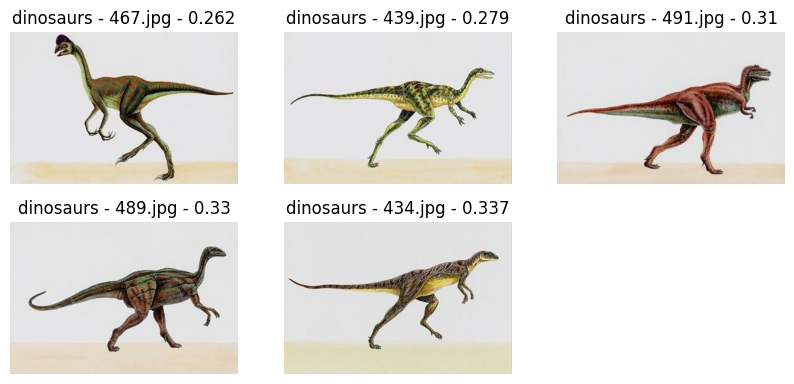

In [13]:
printImg(testImgScipy,sortResScipy,indexScipy)

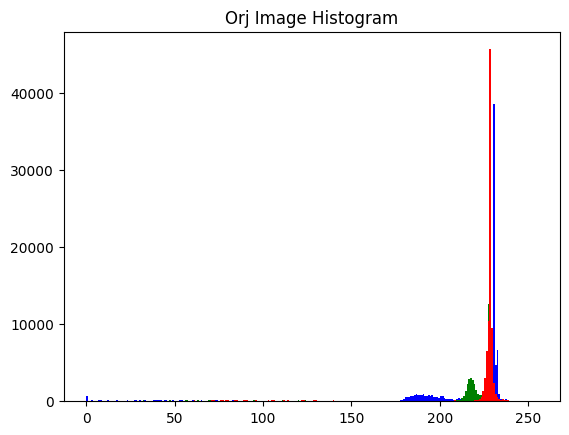

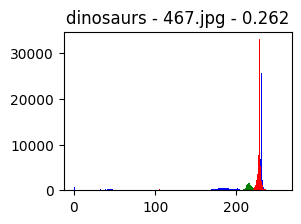

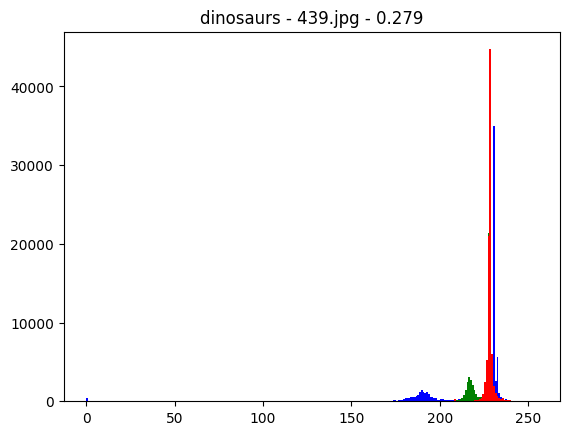

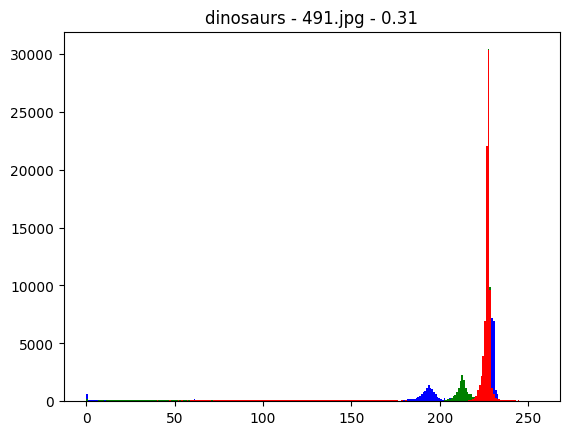

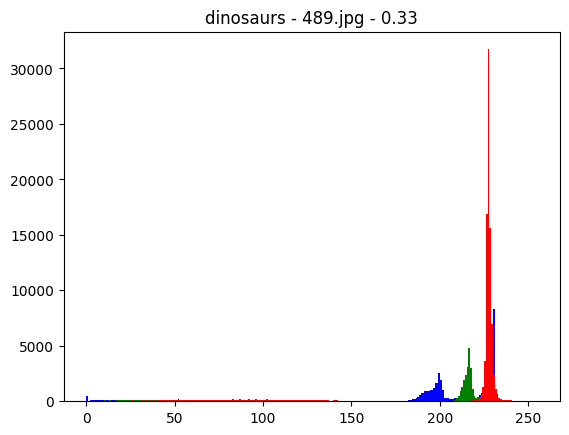

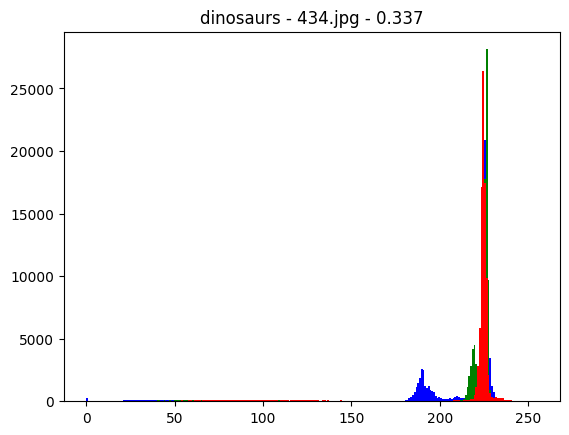

In [14]:
printHist(testImgScipy,sortResScipy,indexScipy)